# Phase IV Data Analysis

## Test 1: Linear Regression Analysis of Stop-and Frisk's Efficacy

### Test 1.a: how stop-and-frisk affects all offenses

In [1]:
# Load libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression

In [2]:
# Load Crime Offenses dataset
nyc_crime = pd.read_csv('nyc_crime')
nyc_crime = nyc_crime.drop(columns = 'Unnamed: 0')
nyc_crime.head()

,offense,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,status
0,murder,471,536,515,419,335,333,352,335,292,295,319,major_felony
1,rape,1205,1373,1420,1445,1378,1352,1438,1438,1449,1794,1755,major_felony
2,robbery,18601,19486,19717,20144,19128,16539,16931,15500,13956,12913,13371,major_felony
3,felony_assault,16773,16956,18482,19381,20297,20207,20270,20847,20052,20208,20698,major_felony
4,burglary,19430,18600,18720,19168,17429,16765,15125,12990,12083,11687,10783,major_felony


In [3]:
# Get number of offenses per year
offense_types = nyc_crime['offense'].count()

# get number of recorded offenses for each year
annual_offenses = []
# iterate through each year (2009 - 2019)

for year in nyc_crime.columns[1:12]:
    count = 0
    
    # iterate through each type of offense
    for offense in range(offense_types):
        count = count + nyc_crime[year][offense]
        
    annual_offenses = annual_offenses + [count]
print(annual_offenses)

[620949, 618061, 605815, 603544, 589372, 577059, 549155, 542586, 519973, 491701, 476605]


In [4]:
# Get the number of stops per year

# Return to this Katherine. Should probably find a dataset or use web scraping to get this info more formally, but for now just enter it in

annual_stops = np.array([581168, 601285, 685724, 532911, 191851, 45787, 22565, 12404, 11629, 11008, 13450])
annual_stops

array([581168, 601285, 685724, 532911, 191851,  45787,  22565,  12404,
        11629,  11008,  13450])

Estimated slope:  0.1452741209175575
Estimated intercept:  527378.0729156163


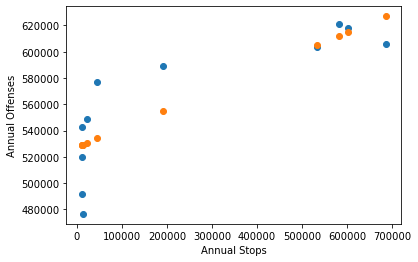

In [5]:
# Perform linear regression with number of stops each year as predictor var X and number of offenses as criterion var y

linear_model = LinearRegression().fit(annual_stops.reshape(-1,1), annual_offenses)

# print slope and intercept
print('Estimated slope: ', linear_model.coef_[0])
print('Estimated intercept: ',linear_model.intercept_) 

# Scatterplot of observed values and predicted values
plt.scatter(annual_stops, annual_offenses, label = 'Observed Values')

predicted_offenses = linear_model.predict(annual_stops.reshape(-1,1))
plt.scatter(annual_stops, predicted_offenses, label = 'Predicted Values')

plt.xlabel('Annual Stops')
plt.ylabel('Annual Offenses')
plt.show()

In [6]:
print('r^2: {:.2f}'.format(linear_model.score(annual_stops.reshape(-1,1), annual_offenses)))

r^2: 0.68


We see here that number of stops is not a great predictor of number of offenses overall. 
The r^2 value (the coefficient of determination) is 0.68, indicating that only 68% of the variation in the number of annual offenses can be predicted by the number of annual stops.

Let's narrow this down to the two crimes targeted by stop and frisk.

### Test 1.a: how stop-and-frisk affects drugs and weapons

In [7]:
# Get number of drug and weapons offenses per year

drugs_weapons = nyc_crime.loc[(nyc_crime['offense'] == 'drugs') | (nyc_crime['offense'] == 'weapons')]

annual_drugsWeapons = []
# iterate through each year

for year in nyc_crime.columns[1:12]:
    
    count = 0
    
    # iterate through each type of charge
    for offense in drugs_weapons[year]:
        count = count + offense
        
    annual_drugsWeapons = annual_drugsWeapons + [count]
        
annual_drugsWeapons

[119646,
 116950,
 115405,
 99693,
 86777,
 80719,
 64283,
 61165,
 55721,
 39077,
 26738]

In [8]:
# Perform linear regression with number of stops each year as predictor var X and number of drug&weapons offenses as criterion var y

dw_linear_model = LinearRegression().fit(annual_stops.reshape(-1,1), annual_drugsWeapons)

# print slope and intercept
print('Estimated slope: ', dw_linear_model.coef_[0])
print('Estimated intercept: ',dw_linear_model.intercept_) 

Estimated slope:  0.10016345342275058
Estimated intercept:  54068.44335065383


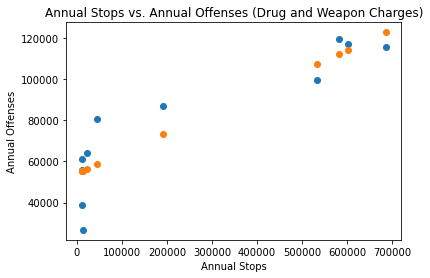

In [9]:
# Scatterplot of observed values and predicted values
plt.scatter(annual_stops, annual_drugsWeapons, label = 'Observed Values')

predicted_dw = dw_linear_model.predict(annual_stops.reshape(-1,1))
plt.scatter(annual_stops, predicted_dw, label = 'Predicted Values')

plt.title('Annual Stops vs. Annual Offenses (Drug and Weapon Charges)')
plt.xlabel('Annual Stops')
plt.ylabel('Annual Offenses')
plt.show()

In [10]:
print('r^2: {:.2f}'.format(dw_linear_model.score(annual_stops.reshape(-1,1), annual_drugsWeapons)))

r^2: 0.80


We see here that number of stops is much better predictor of number of drug & weapons offenses.

The r^2 value (the coefficient of determination) is 0.80, indicating that 80% of the variation in the number of annual offenses can be predicted by the number of annual stops for drugs or weapons. 


### Let's do this again. Just drugs

In [11]:
# Get number of drug and weapons offenses per year

drugs = nyc_crime.loc[nyc_crime['offense'] == 'drugs']

annual_drugs = []
# iterate through each year
for year in nyc_crime.columns[1:12]:

    count = 0
    
    # iterate through each type of charge
    for offense in drugs[year]:
        count = count + offense
        
    annual_drugs = annual_drugs + [count]
        
annual_drugs

[105327,
 102821,
 101767,
 87578,
 75100,
 69948,
 53750,
 50694,
 47034,
 31179,
 20441]

In [12]:
# Perform linear regression with number of stops each year as predictor var X and number of drug offenses as criterion var y

d_linear_model = LinearRegression().fit(annual_stops.reshape(-1,1), annual_drugs)

# print slope and intercept
print('Estimated slope: ', d_linear_model.coef_[0])
print('Estimated intercept: ',d_linear_model.intercept_) 

Estimated slope:  0.09252885677628729
Estimated intercept:  44991.451766094426


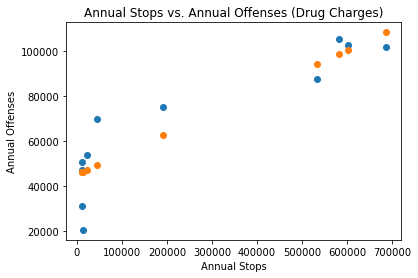

In [13]:
# Scatterplot of observed values and predicted values
plt.scatter(annual_stops, annual_drugs, label = 'Observed Values')

predicted_d = d_linear_model.predict(annual_stops.reshape(-1,1))
plt.scatter(annual_stops, predicted_d, label = 'Predicted Values')

plt.title('Annual Stops vs. Annual Offenses (Drug Charges)')
plt.xlabel('Annual Stops')
plt.ylabel('Annual Offenses')
plt.show()

In [14]:
print('r^2: {:.2f}'.format(d_linear_model.score(annual_stops.reshape(-1,1), annual_drugs)))

r^2: 0.81


### Let's do this again. Just weapons

In [16]:
# Get number of drug and weapons offenses per year

weapons = nyc_crime.loc[nyc_crime['offense'] == 'weapons']

annual_weapons = []
# iterate through each year
for year in nyc_crime.columns[1:12]:

    count = 0
    
    # iterate through each type of charge
    for offense in weapons[year]:
        count = count + offense
        
    annual_weapons = annual_weapons + [count]
        
annual_weapons

[14319, 14129, 13638, 12115, 11677, 10771, 10533, 10471, 8687, 7898, 6297]

In [17]:
# Perform linear regression with number of stops each year as predictor var X and number of WEAPONS offenses as criterion var y

weapons_linear_model = LinearRegression().fit(annual_stops.reshape(-1,1), annual_weapons)

# print slope and intercept
print('Estimated slope: ', weapons_linear_model.coef_[0])
print('Estimated intercept: ', weapons_linear_model.intercept_) 

Estimated slope:  0.007634596646463296
Estimated intercept:  9076.991584559399


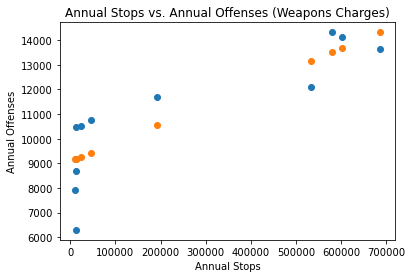

In [18]:
# Scatterplot of observed values and predicted values
plt.scatter(annual_stops, annual_weapons, label = 'Observed Values')

predicted_weapons = weapons_linear_model.predict(annual_stops.reshape(-1,1))
plt.scatter(annual_stops, predicted_weapons, label = 'Predicted Values')

plt.title('Annual Stops vs. Annual Offenses (Weapons Charges)')
plt.xlabel('Annual Stops')
plt.ylabel('Annual Offenses')
plt.show()

In [20]:
print('r^2: {:.2f}'.format(weapons_linear_model.score(annual_stops.reshape(-1,1), annual_weapons)))

r^2: 0.72
